<a href="https://colab.research.google.com/github/ecemboluk/Machine-Learning-and-Deep-Learning-Worksheets/blob/master/Autoencoder_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autoencoder Neural Network**

Otomatik Kodlayıcılar olarak Türkçe'ye çevrilebileceğimiz Autoencoder ağları, özellik çıkarımında ve gürültülü veri içerisinden orjinal verileri çıkarmada oldukça başarılı bir unsupervised learning modelidir. Bilgisayarda görü ve öneri sistemlerinde oldukça popüler olarak kullanılmaktadır. 

## **Autoencoder'lar Nasıl Çalışır?**

Autoencoder'lar giriş verişini çıkış verisine kopyalayan ağlardır. Giriş katmanındaki nöron sayısı ile giriş verisinin boyutu/sayısı aynı olmalıdır. Giriş verisi çıkış verisine kopyalandığı için çıkış katmanındaki nöron sayısı ile giriş katmanındaki nöron sayısı eşit olmalıdır. 

Autoencoder'lar giriş, çıkış ve gizli katman olmak üzere 3 katmandan oluşur. Gizli katman özellik çıkarımı görevindedir. Giriş katmanından gelen veri encoder yapılarak özellikler çıkarılır ve daha sonra decoder yapılarak veri tekrar oluşturulur. Özelliklerin doğru çıkarılması için input size >= hidden layer size olmalıdır.

Autoencoder'lar özellikle çıkarımı dışında gürültülü veriyi orjinal veriye çevirir. Gizli katmanında gürültüyü öğrenerek orjinal verinin başarılı olarak oluşturulmasını sağlar. 

<img src = "https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-06-at-3.17.13-PM.png" />

Şimdi Fashion MNIST veri seti ile bu konuyu biraz pekiştirelim.





## **Kütüphanelerin Kurulumu**

In [3]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **Veri Setinin Yüklenmesi ve Hazırlanması**

In [4]:
(x_train, _ ),(x_test, _ ) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [7]:
x_train = x_train.reshape((len(x_train),28*28))
x_test = x_test.reshape((len(x_test),28*28))

## **Verinin Görselleştirilmesi**

(-0.5, 27.5, 27.5, -0.5)

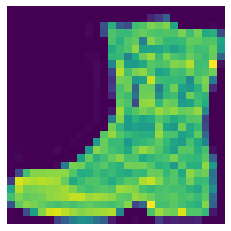

In [9]:
plt.imshow(x_train[150].reshape(28,28))
plt.axis("off")

## **Autoencoder Ağının Oluşturulması**

In [12]:
input_img = Input(shape = (784,))
encoded = Dense(32, activation="relu")(input_img)
encoded = Dense(16,activation="relu")(encoded)
decoded = Dense(32,activation="relu")(encoded)
output_img = Dense(784,activation="sigmoid")(decoded)

autoencoder = Model(input_img,output_img)
autoencoder.compile(optimizer="rmsprop",loss="binary_crossentropy")

hist = autoencoder.fit(x_train,x_train,
                       epochs=200,batch_size=256,
                       shuffle=True,
                       validation_data = (x_train,x_train))

Epoch 1/200
235/235 [==============================] - 3s 14ms/step - loss: 0.4037 - val_loss: 0.3477
Epoch 2/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3341 - val_loss: 0.3296
Epoch 3/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3238 - val_loss: 0.3190
Epoch 4/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3187 - val_loss: 0.3165
Epoch 5/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3151 - val_loss: 0.3133
Epoch 6/200
235/235 [==============================] - 3s 13ms/step - loss: 0.3124 - val_loss: 0.3116
Epoch 7/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3103 - val_loss: 0.3113
Epoch 8/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3087 - val_loss: 0.3066
Epoch 9/200
235/235 [==============================] - 3s 14ms/step - loss: 0.3073 - val_loss: 0.3061
Epoch 10/200
235/235 [==============================] - 3s 15ms/step - loss: 0.306

## **Modelin Değerlendirilmesi**

dict_keys(['loss', 'val_loss'])


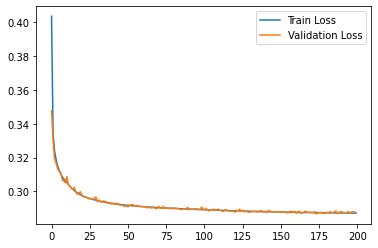

In [13]:
print(hist.history.keys())

plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"],label="Validation Loss")
plt.legend()
plt.show()

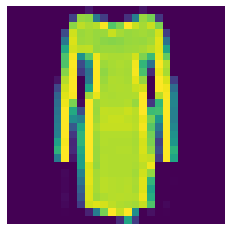

In [14]:
encoder = Model(input_img,encoded)
encoded_img = encoder.predict(x_test)

# Original image
plt.imshow(x_test[1500].reshape(28,28))
plt.axis("off")
plt.show()

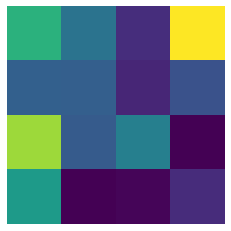

In [15]:
# The image generated by Autoencoder model
plt.imshow(encoded_img[1500].reshape(4,4))
plt.axis("off")
plt.show()

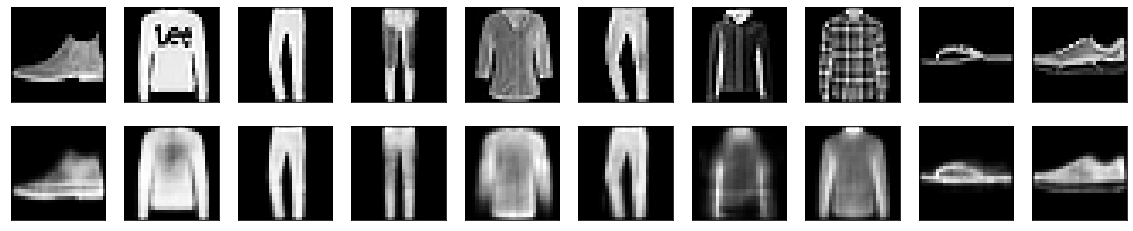

In [16]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()